# Machine Learning Models 
### RICE - 3-mers - Cold Model

In [1]:
# Import Libs
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.set_option('display.max_column', None)

In [2]:
# Read preprocessed dataset
df = pd.read_excel('rice_3mer_dataset.xlsx')
df

,circName,stress,tissue,chr,start,end,strand,start_anno,ACT,TAG,ATC,GGC,GAC,CGT,CTT,CAT,AGA,TGA,CAG,TTC,AAG,AGT,TCT,GTT,ACA,GTG,CCG,GCC,TTG,GTC,TCC,TCG,GAG,ATT,GGA,GTA,CCA,TGC,AGG,GAT,AAT,CCT,TAT,TAC,CAC,TTA,GAA,CTC,AAC,GCT,CTA,ATG,AAA,CAA,TCA,CTG,AGC,GGT,TGT,ATA,TTT,GGG,TGG,ACC,CGG,ACG,CGA,TAA,CGC,GCG,GCA,CCC
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",0.013423,0.006711,0.013423,0.013423,0.006711,0.013423,0.026846,0.013423,0.013423,0.033557,0.020134,0.013423,0.020134,0.013423,0.013423,0.020134,0.026846,0.006711,0.006711,0.020134,0.026846,0.020134,0.033557,0.006711,0.040268,0.013423,0.026846,0.006711,0.020134,0.006711,0.040268,0.006711,0.013423,0.026846,0.026846,0.020134,0.006711,0.020134,0.020134,0.026846,0.006711,0.026846,0.013423,0.020134,0.013423,0.026846,0.020134,0.013423,0.026846,0.013423,0.013423,0.013423,0.033557,0.020134,0.013423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,osa-circ2-OS03T0223400,-,multipleTissue,3,6461672,6462146,-,"exon,CDS",0.010593,0.004237,0.031780,0.006356,0.008475,0.019068,0.031780,0.019068,0.008475,0.025424,0.010593,0.040254,0.012712,0.006356,0.046610,0.019068,0.010593,0.008475,0.006356,0.004237,0.023305,0.010593,0.019068,0.021186,0.010593,0.021186,0.010593,0.002119,0.008475,0.025424,0.008475,0.029661,0.012712,0.033898,0.008475,0.012712,0.010593,0.008475,0.008475,0.033898,0.016949,0.014831,0.012712,0.010593,0.016949,0.029661,0.029661,0.029661,0.012712,0.006356,0.008475,0.006356,0.044492,0.004237,0.012712,0.025424,0.002119,0.002119,0.012712,0.004237,0.008475,0.012712,0.021186,0.004237
2,osa-circ3-OS11T0210300,-,multipleTissue,11,5715883,5716030,-,"exon,CDS",0.000000,0.000000,0.013793,0.006897,0.006897,0.000000,0.006897,0.000000,0.013793,0.055172,0.006897,0.006897,0.013793,0.034483,0.013793,0.034483,0.000000,0.068966,0.013793,0.000000,0.068966,0.000000,0.000000,0.000000,0.062069,0.034483,0.048276,0.006897,0.000000,0.013793,0.034483,0.048276,0.006897,0.000000,0.000000,0.000000,0.000000,0.000000,0.006897,0.000000,0.000000,0.000000,0.000000,0.006897,0.006897,0.013793,0.006897,0.006897,0.000000,0.048276,0.027586,0.000000,0.089655,0.034483,0.055172,0.013793,0.013793,0.000000,0.006897,0.006897,0.006897,0.013793,0.013793,0.000000
3,osa-circ4-OS02T0200900,-,multipleTissue,2,5631023,5631244,-,"exon,CDS",0.013699,0.009132,0.009132,0.013699,0.013699,0.009132,0.054795,0.009132,0.000000,0.004566,0.009132,0.054795,0.000000,0.000000,0.059361,0.036530,0.009132,0.009132,0.018265,0.013699,0.036530,0.004566,0.045662,0.022831,0.004566,0.009132,0.013699,0.004566,0.009132,0.018265,0.013699,0.013699,0.004566,0.036530,0.009132,0.004566,0.009132,0.009132,0.000000,0.054795,0.000000,0.022831,0.009132,0.013699,0.004566,0.000000,0.000000,0.013699,0.009132,0.018265,0.027397,0.004566,0.041096,0.031963,0.022831,0.004566,0.009132,0.000000,0.018265,0.004566,0.018265,0.013699,0.009132,0.031963
4,osa-circ5-OS05T0494800,-,multipleTissue,5,24302336,24302448,+,"exon,CDS",0.000000,0.018182,0.000000,0.018182,0.009091,0.000000,0.009091,0.009091,0.081818,0.063636,0.018182,0.009091,0.054545,0.018182,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,0.109091,0.000000,0.081818,0.009091,0.000000,0.009091,0.100000,0.063636,0.009091,0.000000,0.009091,0.000000,0.000000,0.000000,0.063636,0.000000,0.000000,0.009091,0.000000,0.072727,0.009091,0.000000,0.018182,0.000000,0.000000,0.009091,0.000000,0.018182,0.000000,0.018182,0.009091,0.000000,0.009091,0.009091,0.018182,0.000000,0.000000,0.009091,0.009091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63043,osa-circ63044--,-,multipleTissue,9,15388901,15389056,-,"exon,",0.000000,0.000000,0.013072,0.013072,0.006536,0.000000,0.032680,0.026144,0.013

#### Feature Engineering


In [4]:
# Replace control to 0 and stress to 1 label
df_cold = df.query('stress == "-" or stress == "cold"').replace('-', 0).replace('cold', 1)
df_cold.head()

,circName,stress,tissue,chr,start,end,strand,start_anno,ACT,TAG,ATC,GGC,GAC,CGT,CTT,CAT,AGA,TGA,CAG,TTC,AAG,AGT,TCT,GTT,ACA,GTG,CCG,GCC,TTG,GTC,TCC,TCG,GAG,ATT,GGA,GTA,CCA,TGC,AGG,GAT,AAT,CCT,TAT,TAC,CAC,TTA,GAA,CTC,AAC,GCT,CTA,ATG,AAA,CAA,TCA,CTG,AGC,GGT,TGT,ATA,TTT,GGG,TGG,ACC,CGG,ACG,CGA,TAA,CGC,GCG,GCA,CCC
0,osa-circ1-OS01T0723400,0,multipleTissue,1,30167620,30167771,+,"exon,CDS",0.013423,0.006711,0.013423,0.013423,0.006711,0.013423,0.026846,0.013423,0.013423,0.033557,0.020134,0.013423,0.020134,0.013423,0.013423,0.020134,0.026846,0.006711,0.006711,0.020134,0.026846,0.020134,0.033557,0.006711,0.040268,0.013423,0.026846,0.006711,0.020134,0.006711,0.040268,0.006711,0.013423,0.026846,0.026846,0.020134,0.006711,0.020134,0.020134,0.026846,0.006711,0.026846,0.013423,0.020134,0.013423,0.026846,0.020134,0.013423,0.026846,0.013423,0.013423,0.013423,0.033557,0.020134,0.013423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,osa-circ2-OS03T0223400,0,multipleTissue,3,6461672,6462146,0,"exon,CDS",0.010593,0.004237,0.031780,0.006356,0.008475,0.019068,0.031780,0.019068,0.008475,0.025424,0.010593,0.040254,0.012712,0.006356,0.046610,0.019068,0.010593,0.008475,0.006356,0.004237,0.023305,0.010593,0.019068,0.021186,0.010593,0.021186,0.010593,0.002119,0.008475,0.025424,0.008475,0.029661,0.012712,0.033898,0.008475,0.012712,0.010593,0.008475,0.008475,0.033898,0.016949,0.014831,0.012712,0.010593,0.016949,0.029661,0.029661,0.029661,0.012712,0.006356,0.008475,0.006356,0.044492,0.004237,0.012712,0.025424,0.002119,0.002119,0.012712,0.004237,0.008475,0.012712,0.021186,0.004237
2,osa-circ3-OS11T0210300,0,multipleTissue,11,5715883,5716030,0,"exon,CDS",0.000000,0.000000,0.013793,0.006897,0.006897,0.000000,0.006897,0.000000,0.013793,0.055172,0.006897,0.006897,0.013793,0.034483,0.013793,0.034483,0.000000,0.068966,0.013793,0.000000,0.068966,0.000000,0.000000,0.000000,0.062069,0.034483,0.048276,0.006897,0.000000,0.013793,0.034483,0.048276,0.006897,0.000000,0.000000,0.000000,0.000000,0.000000,0.006897,0.000000,0.000000,0.000000,0.000000,0.006897,0.006897,0.013793,0.006897,0.006897,0.000000,0.048276,0.027586,0.000000,0.089655,0.034483,0.055172,0.013793,0.013793,0.000000,0.006897,0.006897,0.006897,0.013793,0.013793,0.000000
3,osa-circ4-OS02T0200900,0,multipleTissue,2,5631023,5631244,0,"exon,CDS",0.013699,0.009132,0.009132,0.013699,0.013699,0.009132,0.054795,0.009132,0.000000,0.004566,0.009132,0.054795,0.000000,0.000000,0.059361,0.036530,0.009132,0.009132,0.018265,0.013699,0.036530,0.004566,0.045662,0.022831,0.004566,0.009132,0.013699,0.004566,0.009132,0.018265,0.013699,0.013699,0.004566,0.036530,0.009132,0.004566,0.009132,0.009132,0.000000,0.054795,0.000000,0.022831,0.009132,0.013699,0.004566,0.000000,0.000000,0.013699,0.009132,0.018265,0.027397,0.004566,0.041096,0.031963,0.022831,0.004566,0.009132,0.000000,0.018265,0.004566,0.018265,0.013699,0.009132,0.031963
4,osa-circ5-OS05T0494800,0,multipleTissue,5,24302336,24302448,+,"exon,CDS",0.000000,0.018182,0.000000,0.018182,0.009091,0.000000,0.009091,0.009091,0.081818,0.063636,0.018182,0.009091,0.054545,0.018182,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,0.109091,0.000000,0.081818,0.009091,0.000000,0.009091,0.100000,0.063636,0.009091,0.000000,0.009091,0.000000,0.000000,0.000000,0.063636,0.000000,0.000000,0.009091,0.000000,0.072727,0.009091,0.000000,0.018182,0.000000,0.000000,0.009091,0.000000,0.018182,0.000000,0.018182,0.009091,0.000000,0.009091,0.009091,0.018182,0.000000,0.000000,0.009091,0.009091,0.000000


In [5]:
# Removing columns that will not be used
df_cold = df_cold.drop(['circName', 'tissue', 'chr', 'start', 'end', 'strand', 'start_anno'], axis=1)
df_cold.head()

,stress,ACT,TAG,ATC,GGC,GAC,CGT,CTT,CAT,AGA,TGA,CAG,TTC,AAG,AGT,TCT,GTT,ACA,GTG,CCG,GCC,TTG,GTC,TCC,TCG,GAG,ATT,GGA,GTA,CCA,TGC,AGG,GAT,AAT,CCT,TAT,TAC,CAC,TTA,GAA,CTC,AAC,GCT,CTA,ATG,AAA,CAA,TCA,CTG,AGC,GGT,TGT,ATA,TTT,GGG,TGG,ACC,CGG,ACG,CGA,TAA,CGC,GCG,GCA,CCC
0,0,0.013423,0.006711,0.013423,0.013423,0.006711,0.013423,0.026846,0.013423,0.013423,0.033557,0.020134,0.013423,0.020134,0.013423,0.013423,0.020134,0.026846,0.006711,0.006711,0.020134,0.026846,0.020134,0.033557,0.006711,0.040268,0.013423,0.026846,0.006711,0.020134,0.006711,0.040268,0.006711,0.013423,0.026846,0.026846,0.020134,0.006711,0.020134,0.020134,0.026846,0.006711,0.026846,0.013423,0.020134,0.013423,0.026846,0.020134,0.013423,0.026846,0.013423,0.013423,0.013423,0.033557,0.020134,0.013423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0.010593,0.004237,0.031780,0.006356,0.008475,0.019068,0.031780,0.019068,0.008475,0.025424,0.010593,0.040254,0.012712,0.006356,0.046610,0.019068,0.010593,0.008475,0.006356,0.004237,0.023305,0.010593,0.019068,0.021186,0.010593,0.021186,0.010593,0.002119,0.008475,0.025424,0.008475,0.029661,0.012712,0.033898,0.008475,0.012712,0.010593,0.008475,0.008475,0.033898,0.016949,0.014831,0.012712,0.010593,0.016949,0.029661,0.029661,0.029661,0.012712,0.006356,0.008475,0.006356,0.044492,0.004237,0.012712,0.025424,0.002119,0.002119,0.012712,0.004237,0.008475,0.012712,0.021186,0.004237
2,0,0.000000,0.000000,0.013793,0.006897,0.006897,0.000000,0.006897,0.000000,0.013793,0.055172,0.006897,0.006897,0.013793,0.034483,0.013793,0.034483,0.000000,0.068966,0.013793,0.000000,0.068966,0.000000,0.000000,0.000000,0.062069,0.034483,0.048276,0.006897,0.000000,0.013793,0.034483,0.048276,0.006897,0.000000,0.000000,0.000000,0.000000,0.000000,0.006897,0.000000,0.000000,0.000000,0.000000,0.006897,0.006897,0.013793,0.006897,0.006897,0.000000,0.048276,0.027586,0.000000,0.089655,0.034483,0.055172,0.013793,0.013793,0.000000,0.006897,0.006897,0.006897,0.013793,0.013793,0.000000
3,0,0.013699,0.009132,0.009132,0.013699,0.013699,0.009132,0.054795,0.009132,0.000000,0.004566,0.009132,0.054795,0.000000,0.000000,0.059361,0.036530,0.009132,0.009132,0.018265,0.013699,0.036530,0.004566,0.045662,0.022831,0.004566,0.009132,0.013699,0.004566,0.009132,0.018265,0.013699,0.013699,0.004566,0.036530,0.009132,0.004566,0.009132,0.009132,0.000000,0.054795,0.000000,0.022831,0.009132,0.013699,0.004566,0.000000,0.000000,0.013699,0.009132,0.018265,0.027397,0.004566,0.041096,0.031963,0.022831,0.004566,0.009132,0.000000,0.018265,0.004566,0.018265,0.013699,0.009132,0.031963
4,0,0.000000,0.018182,0.000000,0.018182,0.009091,0.000000,0.009091,0.009091,0.081818,0.063636,0.018182,0.009091,0.054545,0.018182,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,0.109091,0.000000,0.081818,0.009091,0.000000,0.009091,0.100000,0.063636,0.009091,0.000000,0.009091,0.000000,0.000000,0.000000,0.063636,0.000000,0.000000,0.009091,0.000000,0.072727,0.009091,0.000000,0.018182,0.000000,0.000000,0.009091,0.000000,0.018182,0.000000,0.018182,0.009091,0.000000,0.009091,0.009091,0.018182,0.000000,0.000000,0.009091,0.009091,0.000000


In [6]:
# Define X and y target variables
X = df_cold.drop(['stress'], axis=1)
y = df_cold['stress']

In [7]:
y.value_counts()

0    50187
1     5724
Name: stress, dtype: int64

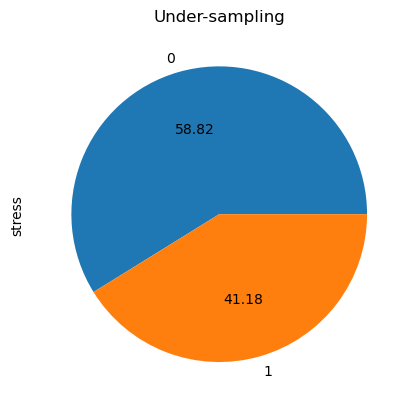

In [12]:
# Balacing data using UnderSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=0.7) 

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [13]:
y_res.value_counts()

0    8177
1    5724
Name: stress, dtype: int64

In [14]:
# Split data into train and teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

## Machine Learning - Cold

In [15]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [01:55<00:00,  3.97s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.74,0.72,0.72,0.73,0.90
RandomForestClassifier,0.73,0.71,0.71,0.73,8.68
XGBClassifier,0.72,0.70,0.70,0.72,4.42
ExtraTreesClassifier,0.73,0.70,0.70,0.72,3.34
SVC,0.70,0.68,0.68,0.70,18.10
AdaBoostClassifier,0.71,0.68,0.68,0.70,3.21
GaussianNB,0.67,0.66,0.66,0.67,0.08
NuSVC,0.69,0.66,0.66,0.68,24.07
BaggingClassifier,0.69,0.65,0.65,0.68,5.62
